Things to improve
- Add more information, such as Deutsch's notebook.
    - Add which gates are applied to transform the initial Bell state into the one that when measured gives us the two clbits we wish to send
    - Add author information
    - Put the information prior to their corresponding code

# Superdense Coding

Suppose Alice wants to send Bob 2 classical bits of information. Superdense coding is a way in which she can achieve this through a quantum channel, using only 1 qubit. Initially, a qubit from the Bell pair $\ket{B_{00}} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$ is given to Alice and Bob. Alice can then send any 2 classical bits by applying gates to her qubit. Finally, she sends her qubit after the corresponding gates have been applied and Bob performs a Bell Measurement with both qubits, determining the Bell state they're in. 

In this notebook, we explore superdense coding through IBM's Qiskit, in order to gain a practical understanding of it. 

Sources:
1. Kaye, P., Laflamme, R., & Mosca, M. (2007). *An Introduction to Quantum Computing*. Oxford University Press.


#### Steps
- Create the Bell State $\ket{B_{00}}$
- Simulate Alice's application of operators to encode the classical bits she wishes to send
- Implement a Bell Measurement at the end of the circuit. 
- Measure and obtain results. 

In [266]:
# Standard library imports
import os
import sys

# Adjust the system path to include the project root
# This allows for importing from other directories within the project structure.
project_root = os.path.abspath("..")  # Assumes this script is one level from the root
sys.path.append(project_root)

from qiskit import QuantumCircuit 
from src import utils

In [267]:
def bell_state_qc():
    # Creating a Bell state
    qc = QuantumCircuit(2, 2)

    # Putting the first qubit into a superposition of 0 and 1
    qc.h(0)

    qc.cx(0, 1)
    qc.barrier()
    
    return qc


def bitstring_circuit(qc, bitstring):
    """Description: This function adds gates that perform unitary transformations to Alice's qubit in order to encode the 2 clbits she wants to send

    Returns:
        _type_: _description_
    """
    if bitstring == '00':
        None
    elif bitstring == '01':
        qc.x(0)
        qc.barrier()
    elif bitstring == '10':
        qc.z(0)
        qc.barrier()
    elif bitstring == '11':
        qc.x(0)
        qc.z(0)
        qc.barrier()
        
    
    return qc

def bell_measurement(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.barrier()

    qc.measure(0,1)
    qc.measure(1,0)
    
    return qc

#### Create the Bell State $\ket{\beta_{00}}$

To create the Bell State $\ket{\beta_{00}} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})$, we start off with a 2 qubit system, and apply and H gate to the first qubit, thus putting it into a superposition of $\ket{0}$ and $\ket{1}$. We then apply a controlled not gate, or CNOT $\oplus$, using the first qubit as the control and the second as target. After doing this if the first qubit is in state $\ket{0}$, the second qubit will share the same state, and viceversa with the $\ket{1}$ state. 

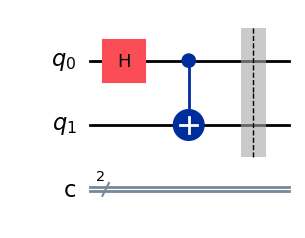

In [268]:
qc = bell_state_qc()
qc.draw('mpl')

We then use the bitstring_circuit function to encode the bitstring we want to send by including quantum gates in the circuit that are applied to Alice's qubit. 

To send 
$$ 00 \rightarrow I \otimes I $$
$$ 01 \rightarrow X \otimes I $$
$$ 10 \rightarrow Z \otimes I $$
$$ 11 \rightarrow Z \cdot X \otimes I $$

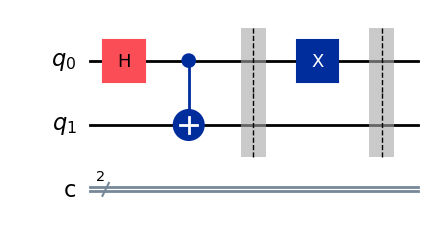

In [269]:
qc = bitstring_circuit(qc, '01')
qc.draw('mpl')

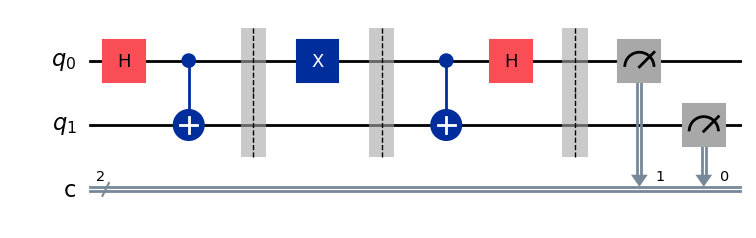

In [270]:
qc = bell_measurement(qc)
qc.draw('mpl')

In [271]:
transpiled_qc = utils.transpile_qc(qc)
noise_m = utils.create_noise_model(p_depol=0.05)

results = utils.run_circuit(transpiled_qc, shots = 1024)
noisy_results = utils.run_circuit(transpiled_qc, shots = 1024, noise_model=noise_m)


In [272]:
print(f"Ideal Simulation result counts {results.get_counts()}")
print(f"Noisy Simulation result counts {noisy_results.get_counts()}")

Ideal Simulation result counts {'01': 1024}
Noisy Simulation result counts {'01': 938, '11': 62, '00': 14, '10': 10}
